In [39]:
import tensorflow as tf
from tensorflow.keras.layers import concatenate, Conv2D, Input, Lambda, Dropout, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [40]:
augmented_imgs_path = os.path.join('data','augmented', 'aug_imgs')
augmented_masks_path = os.path.join('data', 'augmented', 'aug_masks')

In [42]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3 #RGB

In [43]:
#Build the model
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = Dropout(0.1)(c1)
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.1)(c2)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)

c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = Dropout(0.3)(c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = Dropout(0.2)(c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.1)(c8)
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.1)(c9)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

# #Modelcheckpoint
# checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

# callbacks = [
#         tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
#         tf.keras.callbacks.TensorBoard(log_dir='logs')]



Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 256, 256,  │       0 │ -                    │
│ (InputLayer)        │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ lambda_6 (Lambda)   │ (None, 256, 256,  │       0 │ input_layer_6[0][0]  │
│                     │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 256, 256,  │     448 │ lambda_6[0][0]       │
│                     │ 16)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dropout_46          │ (None, 256, 256,  │       0 │ conv2d_96[0][0]      │
│ (Dropout)           │ 16)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 256, 256,  │   2,320 │ dropout_46[0][0]     │
│                     │ 16)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ max_pooling2d_24    │ (None, 128, 128,  │       0 │ conv2d_97[0][0]      │
│ (MaxPooling2D)      │ 16)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 128, 128,  │   4,640 │ max_pooling2d_24[0]… │
│                     │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dropout_47          │ (None, 128, 128,  │       0 │ conv2d_98[0][0]      │
│ (Dropout)           │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_99 (Conv2D)  │ (None, 128, 128,  │   9,248 │ dropout_47[0][0]     │
│                     │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ max_pooling2d_25    │ (None, 64, 64,    │       0 │ conv2d_99[0][0]      │
│ (MaxPooling2D)      │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_100 (Conv2D) │ (None, 64, 64,    │  18,496 │ max_pooling2d_25[0]… │
│                     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dropout_48          │ (None, 64, 64,    │       0 │ conv2d_100[0][0]     │
│ (Dropout)           │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_101 (Conv2D) │ (None, 64, 64,    │  36,928 │ dropout_48[0][0]     │
│                     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ max_pooling2d_26    │ (None, 32, 32,    │       0 │ conv2d_101[0][0]     │
│ (MaxPooling2D)      │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_102 (Conv2D) │ (None, 32, 32,    │  73,856 │ max_pooling2d_26[0]… │
│                     │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dropout_49          │ (None, 32, 32,    │       0 │ conv2d_102[0][0]     │
│ (Dropout)           │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_103 (Conv2D) │ (None, 32, 32,    │ 147,584 │ dropout_49[0][0]   

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 1.0316e-04 - loss: -1042.9904 - val_accuracy: 4.5776e-04 - val_loss: -1024.2709
Epoch 2/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 926ms/step - accuracy: 7.0445e-04 - loss: -1049.4027 - val_accuracy: 8.4941e-04 - val_loss: -1023.4886
Epoch 3/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 952ms/step - accuracy: 0.0011 - loss: -1052.1802 - val_accuracy: 8.4941e-04 - val_loss: -1023.4886


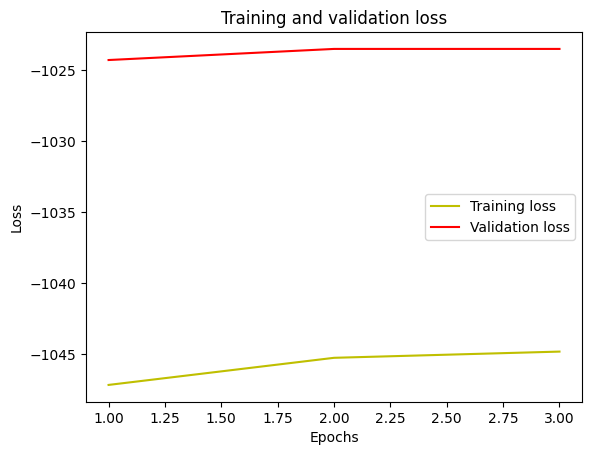

[ WARN:0@5235.331] global loadsave.cpp:248 findDecoder imread_('membrane/test/0.png'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [47]:
train_images = []
train_masks = []

for i in range(1, len(os.listdir(augmented_imgs_path))):
    img = cv2.imread(os.path.join(augmented_imgs_path, f'{i}.png'), cv2.IMREAD_COLOR)
    mask = cv2.imread(os.path.join(augmented_masks_path, f'{i}.png'), cv2.IMREAD_GRAYSCALE)
    train_images.append(img)
    train_masks.append(mask)

#Use customary x_train and y_train variables
X = np.array(train_images)
Y = np.array(train_masks)

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

history=model.fit(x_train, 
        y_train,
        batch_size=8, 
        epochs=3,
        verbose=1,
        validation_data=(x_val, y_val))


#plot the training and validation accuracy and loss at each epoch
#accuracy = model.evaluate(x_val, y_val)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
#plt.plot(epochs, accuracy, 'b', label='Accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('membrane/test/0.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (IMG_HEIGHT, IMG_WIDTH))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
plt.imsave(os.path.join('segmentations', f'img_test.jpeg'), prediction_image, cmap='gray')